In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.stats import linregress

In [44]:
df = pd.read_csv('AQDM_524812845.txt')
df.head(100)

C:\Users\jjoha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Latitude,Longitude,Datum,Horizontal Accuracy,State Code,County Code,Site Num,Parameter Code,POC,AQS Parameter Desc,...,Day In Year GMT,Sample Measurement,Units of Measure,Sample Duration,Sample Frequency,Detection Limit,Measurement Uncertainty,Qualifier Description,Method Type,Method Description
0,32.8455,-117.123894,WGS84,1.00,6.0,73.0,1016.0,44201.0,1.0,Ozone,...,50.0,0.044,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
1,32.7015,-117.149653,WGS84,10.00,6.0,73.0,1010.0,44201.0,1.0,Ozone,...,50.0,0.031,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
2,32.5522,-116.937772,WGS84,0.00,6.0,73.0,2007.0,44201.0,1.0,Ozone,...,50.0,0.034,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
3,33.217,-117.396158,WGS84,54.65,6.0,73.0,1008.0,44201.0,1.0,Ozone,...,50.0,0.046,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
4,32.8422,-116.768225,WGS84,0.00,6.0,73.0,1006.0,44201.0,1.0,Ozone,...,50.0,0.035,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
5,33.1277,-117.075325,WGS84,0.00,6.0,73.0,1002.0,44201.0,1.0,Ozone,...,50.0,0.040,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
6,32.7912,-116.942092,WGS84,0.00,6.0,73.0,3.0,44201.0,1.0,Ozone,...,50.0,0.029,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
7,32.6312,-117.059075,WGS84,0.00,6.0,73.0,1.0,44201.0,1.0,Ozone,...,50.0,0.043,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
8,32.6312,-117.059075,WGS84,0.00,6.0,73.0,1.0,44201.0,1.0,Ozone,...,50.0,0.044,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET
9,32.7912,-116.942092,WGS84,0.00,6.0,73.0,3.0,44201.0,1.0,Ozone,...,50.0,0.031,Parts per million,1 HOUR,NaN,0.005,NaN,NaN,Equivalent,INSTRUMENTAL-ULTRA VIOLET


In [45]:
df = df[['Latitude', 'Longitude', 'County Code', 'Site Num', 'Date Local', 'Sample Measurement','Units of Measure']]

In [46]:
df.head(15)

,Latitude,Longitude,County Code,Site Num,Date Local,Sample Measurement,Units of Measure
0,32.8455,-117.123894,73.0,1016.0,2013-02-18,0.044,Parts per million
1,32.7015,-117.149653,73.0,1010.0,2013-02-18,0.031,Parts per million
2,32.5522,-116.937772,73.0,2007.0,2013-02-18,0.034,Parts per million
3,33.217,-117.396158,73.0,1008.0,2013-02-18,0.046,Parts per million
4,32.8422,-116.768225,73.0,1006.0,2013-02-18,0.035,Parts per million
5,33.1277,-117.075325,73.0,1002.0,2013-02-18,0.040,Parts per million
6,32.7912,-116.942092,73.0,3.0,2013-02-18,0.029,Parts per million
7,32.6312,-117.059075,73.0,1.0,2013-02-18,0.043,Parts per million
8,32.6312,-117.059075,73.0,1.0,2013-02-18,0.044,Parts per million
9,32.7912,-116.942092,73.0,3.0,2013-02-18,0.031,Parts per million


In [47]:
del df['Units of Measure']
df.rename(columns={"Sample Measurement": "Sample Measurement (ppm)"}, inplace = True)

In [48]:
df['Sample Measurement (ppb)'] = df['Sample Measurement (ppm)'] * 1000
df.head(10)

,Latitude,Longitude,County Code,Site Num,Date Local,Sample Measurement (ppm),Sample Measurement (ppb)
0,32.8455,-117.123894,73.0,1016.0,2013-02-18,0.044,44.0
1,32.7015,-117.149653,73.0,1010.0,2013-02-18,0.031,31.0
2,32.5522,-116.937772,73.0,2007.0,2013-02-18,0.034,34.0
3,33.217,-117.396158,73.0,1008.0,2013-02-18,0.046,46.0
4,32.8422,-116.768225,73.0,1006.0,2013-02-18,0.035,35.0
5,33.1277,-117.075325,73.0,1002.0,2013-02-18,0.040,40.0
6,32.7912,-116.942092,73.0,3.0,2013-02-18,0.029,29.0
7,32.6312,-117.059075,73.0,1.0,2013-02-18,0.043,43.0
8,32.6312,-117.059075,73.0,1.0,2013-02-18,0.044,44.0
9,32.7912,-116.942092,73.0,3.0,2013-02-18,0.031,31.0


In [61]:
df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
df['Year'] = pd.DatetimeIndex(df['Date Local']).year
df.head()

,Latitude,Longitude,County Code,Site Num,Date Local,Sample Measurement (ppm),Sample Measurement (ppb),Year
0,32.8455,-117.123894,73.0,1016.0,2013-02-18,0.044,44.0,2013.0
1,32.7015,-117.149653,73.0,1010.0,2013-02-18,0.031,31.0,2013.0
2,32.5522,-116.937772,73.0,2007.0,2013-02-18,0.034,34.0,2013.0
3,33.217,-117.396158,73.0,1008.0,2013-02-18,0.046,46.0,2013.0
4,32.8422,-116.768225,73.0,1006.0,2013-02-18,0.035,35.0,2013.0


In [62]:
df_2013 = df.loc[df['Year']==2013,:]
df_2013

,Latitude,Longitude,County Code,Site Num,Date Local,Sample Measurement (ppm),Sample Measurement (ppb),Year
0,32.8455,-117.123894,73.0,1016.0,2013-02-18,0.044,44.0,2013.0
1,32.7015,-117.149653,73.0,1010.0,2013-02-18,0.031,31.0,2013.0
2,32.5522,-116.937772,73.0,2007.0,2013-02-18,0.034,34.0,2013.0
3,33.217,-117.396158,73.0,1008.0,2013-02-18,0.046,46.0,2013.0
4,32.8422,-116.768225,73.0,1006.0,2013-02-18,0.035,35.0,2013.0
5,33.1277,-117.075325,73.0,1002.0,2013-02-18,0.040,40.0,2013.0
6,32.7912,-116.942092,73.0,3.0,2013-02-18,0.029,29.0,2013.0
7,32.6312,-117.059075,73.0,1.0,2013-02-18,0.043,43.0,2013.0
8,32.6312,-117.059075,73.0,1.0,2013-02-18,0.044,44.0,2013.0
9,32.7912,-116.942092,73.0,3.0,2013-02-18,0.031,31.0,2013.0


In [64]:
date_group = df_2013[['Date Local', 'Sample Measurement (ppb)']].groupby('Date Local')
date_df = pd.DataFrame(date_group.mean())
date_df

,Sample Measurement (ppb)
Date Local,
2013-01-01,21.677165
2013-01-02,18.791837
2013-01-03,17.411290
2013-01-04,19.705645
2013-01-05,17.562992
2013-01-06,22.071146
2013-01-07,18.678571
2013-01-08,14.877470
2013-01-09,16.924303


In [65]:
date_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Date Local', length=365, freq=None)

(-10, 60)

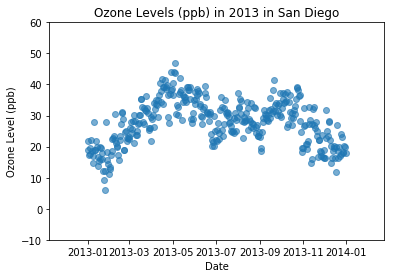

In [74]:
plt.scatter(date_df.index, date_df['Sample Measurement (ppb)'], alpha=0.6)
plt.title('Ozone Levels (ppb) in 2013 in San Diego')
plt.ylabel('Ozone Level (ppb)')
plt.xlabel('Date')
plt.ylim(-10, 60)

In [77]:
asthma_df = pd.read_csv('asthma-ed-visits.csv')
asthma_df.head(10)

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28
5,Asthma ED Visit Rates,Colusa,2015,18 and Over,Total Population,18 and Over,49,29.0,7,28
6,Asthma ED Visit Rates,Contra Costa,2015,18 and Over,Total Population,18 and Over,"4,528",54.8,7,28
7,Asthma ED Visit Rates,Del Norte,2015,18 and Over,Total Population,18 and Over,91,41.9,7,28
8,Asthma ED Visit Rates,El Dorado,2015,18 and Over,Total Population,18 and Over,422,32.8,7,28
9,Asthma ED Visit Rates,Fresno,2015,18 and Over,Total Population,18 and Over,"3,454",49.5,7,28


In [92]:
asthma_2011 = asthma_df.loc[(asthma_df['Year']==2011) & (asthma_df['Geography']=='San Diego') & (asthma_df['Age Group'] == 'Under 18') & (asthma_df['Strata Name']=='African-American'),:]
asthma_2011
asthma_2012 = asthma_df.loc[(asthma_df['Year']==2012) & (asthma_df['Geography']=='San Diego') & (asthma_df['Age Group'] == 'Under 18') & (asthma_df['Strata Name']=='African-American'),:]
asthma_2012
asthma_2013 = asthma_df.loc[(asthma_df['Year']==2013) & (asthma_df['Geography']=='San Diego') & (asthma_df['Age Group'] == 'Under 18') & (asthma_df['Strata Name']=='African-American'),:]
asthma_2013
asthma_2014 = asthma_df.loc[(asthma_df['Year']==2014) & (asthma_df['Geography']=='San Diego') & (asthma_df['Age Group'] == 'Under 18') & (asthma_df['Strata Name']=='African-American'),:]
asthma_2014
asthma_2015 = asthma_df.loc[(asthma_df['Year']==2015) & (asthma_df['Geography']=='San Diego') & (asthma_df['Age Group'] == 'Under 18') & (asthma_df['Strata Name']=='African-American'),:]
asthma_2015

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
875,Asthma ED Visit Rates,San Diego,2015,Under 18,Race-Ethnicity,African-American,587,181.9,7,28


In [99]:
asthma_2011_to_2015 = pd.concat([asthma_2011, asthma_2012, asthma_2013, asthma_2014, asthma_2015])

In [100]:
asthma_2011_to_2015

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
5398,Asthma ED Visit Rates,San Diego,2011,Under 18,Race-Ethnicity,African-American,654,188.3,7,28
4274,Asthma ED Visit Rates,San Diego,2012,Under 18,Race-Ethnicity,African-American,701,204.8,7,28
3168,Asthma ED Visit Rates,San Diego,2013,Under 18,Race-Ethnicity,African-American,566,172.1,7,28
2035,Asthma ED Visit Rates,San Diego,2014,Under 18,Race-Ethnicity,African-American,601,182.4,7,28
875,Asthma ED Visit Rates,San Diego,2015,Under 18,Race-Ethnicity,African-American,587,181.9,7,28


Text(0.5,1,'Asthma Visit Rates for African American Children in San Diego from 2011 to 2015')

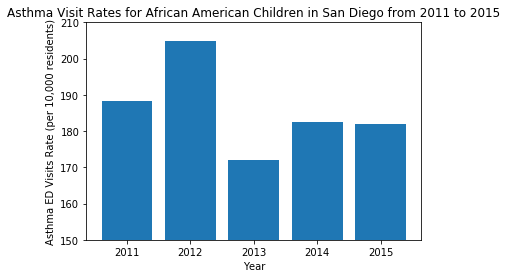

In [108]:
plt.bar(asthma_2011_to_2015['Year'], asthma_2011_to_2015['Rate'])
plt.ylim(150, 210)
plt.xlabel('Year')
plt.ylabel('Asthma ED Visits Rate (per 10,000 residents)')
plt.title('Asthma Visit Rates for African American Children in San Diego from 2011 to 2015')

In [112]:
asthma_df = asthma_df.loc[asthma_df['Geography'] != 'California', :]

In [113]:
asthma_df

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
5,Asthma ED Visit Rates,Colusa,2015,18 and Over,Total Population,18 and Over,49,29.0,7,28
6,Asthma ED Visit Rates,Contra Costa,2015,18 and Over,Total Population,18 and Over,"4,528",54.8,7,28
7,Asthma ED Visit Rates,Del Norte,2015,18 and Over,Total Population,18 and Over,91,41.9,7,28
8,Asthma ED Visit Rates,El Dorado,2015,18 and Over,Total Population,18 and Over,422,32.8,7,28
9,Asthma ED Visit Rates,Fresno,2015,18 and Over,Total Population,18 and Over,"3,454",49.5,7,28
10,Asthma ED Visit Rates,Glenn,2015,18 and Over,Total Population,18 and Over,83,39.4,7,28


In [137]:
asthma_df_total_child_pop_2013 = asthma_df.loc[(asthma_df['Year']==2013) & (asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='Under 18'),:]
asthma_df_total_child_pop_2013.rename(columns={"Geography": "County"}, inplace=True)
asthma_df_total_child_pop_2013

C:\Users\jjoha\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,LGHC Indicator Name,County,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
3090,Asthma ED Visit Rates,Alameda,2013,Under 18,Total Population,Under 18,"3,269",92.6,7,28
3091,Asthma ED Visit Rates,Amador,2013,Under 18,Total Population,Under 18,52,91.9,7,28
3092,Asthma ED Visit Rates,Butte,2013,Under 18,Total Population,Under 18,275,61.5,7,28
3093,Asthma ED Visit Rates,Calaveras,2013,Under 18,Total Population,Under 18,60,78.7,7,28
3095,Asthma ED Visit Rates,Colusa,2013,Under 18,Total Population,Under 18,38,62.5,7,28
3096,Asthma ED Visit Rates,Contra Costa,2013,Under 18,Total Population,Under 18,"2,251",91.5,7,28
3097,Asthma ED Visit Rates,Del Norte,2013,Under 18,Total Population,Under 18,48,85.1,7,28
3098,Asthma ED Visit Rates,El Dorado,2013,Under 18,Total Population,Under 18,135,37.7,7,28
3099,Asthma ED Visit Rates,Fresno,2013,Under 18,Total Population,Under 18,"3,814",134.4,7,28
3100,Asthma ED Visit Rates,Glenn,2013,Under 18,Total Population,Under 18,33,43.5,7,28


In [123]:
asthma_df_total_child_pop_2013.count()

LGHC Indicator Name    56
Geography              56
Year                   56
Age Group              56
Strata                 56
Strata Name            56
Numerator              56
Rate                   55
LGHC Indicator ID      56
LGHC Target Rate       56
dtype: int64

In [126]:
asthma_df_total_child_pop_2013.dropna(subset=['Rate'], inplace=True)
asthma_df_total_child_pop_2013.count()

C:\Users\jjoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LGHC Indicator Name    55
Geography              55
Year                   55
Age Group              55
Strata                 55
Strata Name            55
Numerator              55
Rate                   55
LGHC Indicator ID      55
LGHC Target Rate       55
dtype: int64

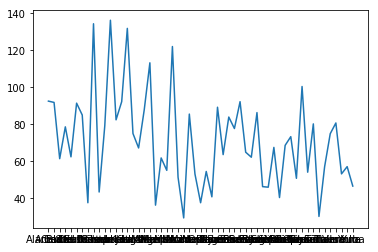

In [127]:
plt.plot(asthma_df_total_child_pop_2013['Geography'], asthma_df_total_child_pop_2013['Rate'])

In [147]:
aqi_2013 = pd.read_csv('project/daily_aqi_by_county_2013.csv')

In [148]:
aqi_2013.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2013-01-01,30,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2013-01-04,32,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2013-01-07,36,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2013-01-10,29,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2013-01-13,30,Good,PM2.5,01-003-0010,1


In [149]:
aqi_2013['Defining Parameter'].value_counts()

Ozone    175162
PM2.5    119217
PM10      14343
SO2       13526
NO2        4992
CO          893
Name: Defining Parameter, dtype: int64

In [151]:
ca_ozone_2013 = aqi_2013.loc[(aqi_2013['State Name']=='California') & (aqi_2013['Defining Parameter'] =='Ozone'), :]

In [152]:
ca_ozone_2013.head(10)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
14533,California,Alameda,6,1,2013-01-26,35,Good,Ozone,06-001-0007,4
14534,California,Alameda,6,1,2013-01-27,31,Good,Ozone,06-001-0011,4
14545,California,Alameda,6,1,2013-02-07,37,Good,Ozone,06-001-0007,4
14556,California,Alameda,6,1,2013-02-18,39,Good,Ozone,06-001-0011,4
14557,California,Alameda,6,1,2013-02-19,35,Good,Ozone,06-001-0007,4
14561,California,Alameda,6,1,2013-02-23,38,Good,Ozone,06-001-0007,4
14562,California,Alameda,6,1,2013-02-24,38,Good,Ozone,06-001-0007,4
14571,California,Alameda,6,1,2013-03-05,37,Good,Ozone,06-001-0011,4
14587,California,Alameda,6,1,2013-03-21,36,Good,Ozone,06-001-0007,4
14588,California,Alameda,6,1,2013-03-22,47,Good,Ozone,06-001-0007,4


In [159]:
county_group = pd.DataFrame(ca_ozone_2013.loc[:,['county Name', 'AQI']].groupby('county Name').mean())
county_group


,AQI
county Name,
Alameda,43.493976
Amador,39.369863
Butte,56.542986
Calaveras,46.799127
Colusa,35.344371
Contra Costa,41.798319
El Dorado,54.759669
Fresno,92.497674
Glenn,42.908213


In [160]:
county_group = county_group.reset_index()
county_group = county_group.rename(columns={'county Name': 'County'})
county_group

,County,AQI
0,Alameda,43.493976
1,Amador,39.369863
2,Butte,56.542986
3,Calaveras,46.799127
4,Colusa,35.344371
5,Contra Costa,41.798319
6,El Dorado,54.759669
7,Fresno,92.497674
8,Glenn,42.908213
9,Humboldt,29.451389


In [161]:
ozone_asthma_df = county_group.merge(asthma_df_total_child_pop_2013, on='County')

In [162]:
ozone_asthma_df

,County,AQI,LGHC Indicator Name,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Alameda,43.493976,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,"3,269",92.6,7,28
1,Amador,39.369863,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,52,91.9,7,28
2,Butte,56.542986,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,275,61.5,7,28
3,Calaveras,46.799127,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,60,78.7,7,28
4,Colusa,35.344371,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,38,62.5,7,28
5,Contra Costa,41.798319,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,"2,251",91.5,7,28
6,El Dorado,54.759669,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,135,37.7,7,28
7,Fresno,92.497674,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,"3,814",134.4,7,28
8,Glenn,42.908213,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,33,43.5,7,28
9,Humboldt,29.451389,Asthma ED Visit Rates,2013,Under 18,Total Population,Under 18,205,79.3,7,28


In [170]:
(slope, intercept, _, _, _) = linregress(ozone_asthma_df['AQI'],ozone_asthma_df['Rate'])
fit= slope * ozone_asthma_df['AQI'] + intercept
fit

0     67.051337
1     64.978367
2     73.610375
3     68.712659
4     62.954968
5     66.199021
6     72.713996
7     91.682868
8     66.756905
9     59.992882
10    78.754855
11    69.448087
12    93.443299
13    84.355047
14    62.163977
15    97.621547
16    85.258848
17    61.600652
18    75.348030
19    61.329782
20    78.823398
21    63.674699
22    61.823336
23    73.816226
24    72.003690
25    72.382178
26    98.964793
27    73.904064
28    67.509252
29    99.356527
30    82.189973
31    60.203591
32    74.651179
33    76.379322
34    61.850242
35    69.787257
36    67.730000
37    63.942943
38    67.888529
39    63.724705
40    65.311858
41    61.642847
42    75.843759
43    69.855594
44    69.808766
45    91.562945
46    67.566678
47    72.645769
48    65.478378
Name: AQI, dtype: float64

Text(0,0.5,'Rate of ED Visits for Asthma (per 10,000)')

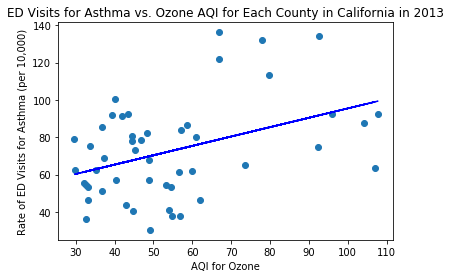

In [173]:
plt.scatter(ozone_asthma_df['AQI'],ozone_asthma_df['Rate'])
plt.plot(ozone_asthma_df['AQI'], fit, 'b--')
plt.title('ED Visits for Asthma vs. Ozone AQI for Each County in California in 2013')
plt.xlabel('AQI for Ozone')
plt.ylabel('Rate of ED Visits for Asthma (per 10,000)')
